In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
df_proto_cp_result = pd.read_csv('../result_summary/protonet_cp+_result_summary.csv')
df_proto_img_result = pd.read_csv('../result_summary/protonet_img_result_summary_4.csv')

In [7]:
proto_img_after_16 = np.array([float(df_proto_img_result['16_auc_after_train'][i].split('+/-')[0]) for i in range(len(df_proto_img_result))])
proto_img_after_32 = np.array([float(df_proto_img_result['32_auc_after_train'][i].split('+/-')[0]) for i in range(len(df_proto_img_result))])
proto_img_after_64 = np.array([float(df_proto_img_result['64_auc_after_train'][i].split('+/-')[0]) for i in range(len(df_proto_img_result))])
proto_img_after_96 = np.array([float(df_proto_img_result['96_auc_after_train'][i].split('+/-')[0]) for i in range(len(df_proto_img_result))])

proto_cp_after_16 = np.array([float(df_proto_cp_result['16_auc_after_train'][i].split('+/-')[0]) for i in range(len(df_proto_cp_result))])
proto_cp_after_32 = np.array([float(df_proto_cp_result['32_auc_after_train'][i].split('+/-')[0]) for i in range(len(df_proto_cp_result))])
proto_cp_after_64 = np.array([float(df_proto_cp_result['64_auc_after_train'][i].split('+/-')[0]) for i in range(len(df_proto_cp_result))])
proto_cp_after_96 = np.array([float(df_proto_cp_result['96_auc_after_train'][i].split('+/-')[0]) for i in range(len(df_proto_cp_result))])

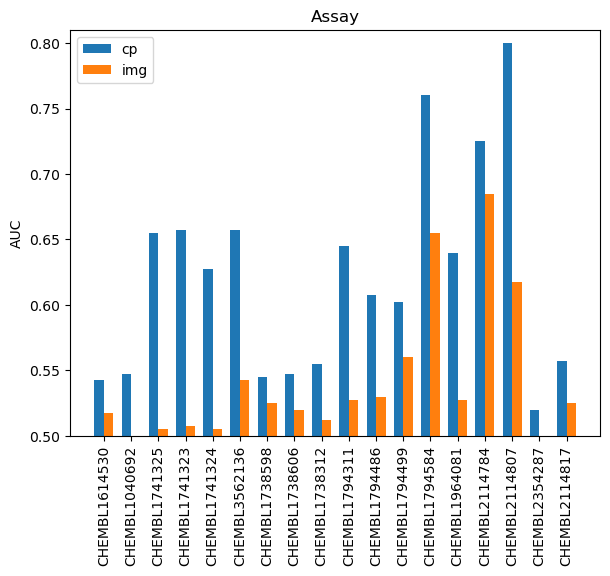

In [8]:
# Improvements for each assay 1
avg_cp = np.mean([proto_cp_after_16, proto_cp_after_32, proto_cp_after_64, proto_cp_after_96], axis=0)
avg_img = np.mean([proto_img_after_16, proto_img_after_32, proto_img_after_64, proto_img_after_96], axis=0)
labels = list(df_proto_cp_result['assay_chembl_id'])

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, avg_cp, width, label='cp')
rects2 = ax.bar(x + width/2, avg_img, width, label='img')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('AUC')
ax.set_title('Assay')
ax.set_xticks(x, labels)
ax.legend(loc='upper left')

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.tick_params(axis='x', labelrotation=90)

plt.ylim([0.5, 0.81])

plt.show()